<a href="https://colab.research.google.com/github/JaredDRodriguez/Notebook_PDI_LAB/blob/main/Actividad_Fundamental_4_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AF 4.- Transformadas geométricas y de Fourier

Preprocesamiento

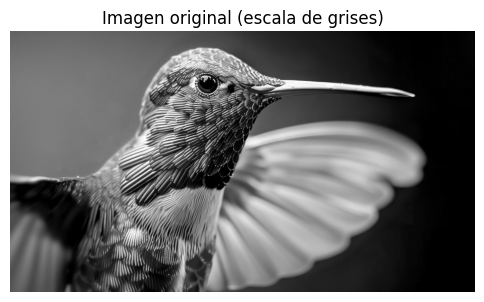

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Función para cargar imagen desde una URL
def load_image_from_url(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    return img

# Cargar imagen
url = "https://github.com/dilp90/PDI/raw/main/Imagenes/colibri.jpg"
img = load_image_from_url(url)

# Mostrar imagen
plt.figure(figsize=(6, 6))
plt.title("Imagen Colibri (gray)")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


Trasnformaciones geometricas

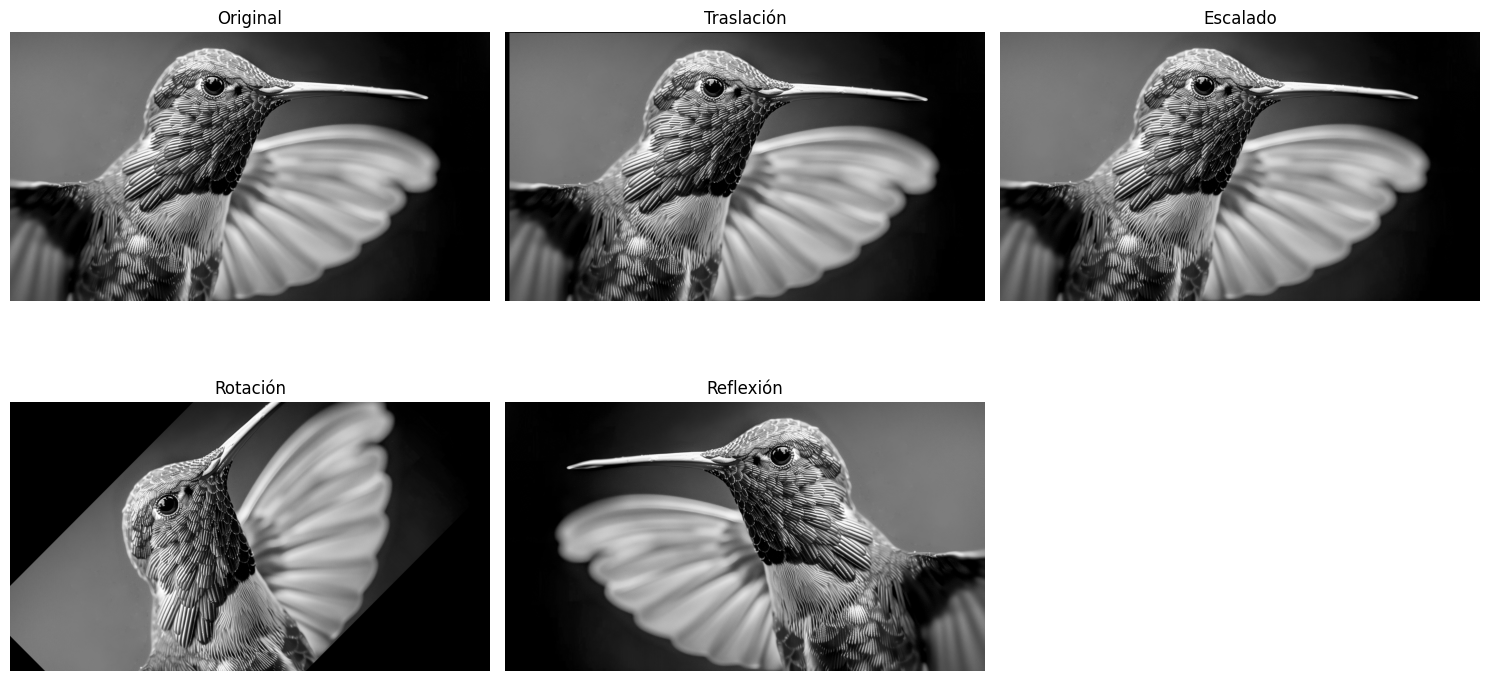

In [ ]:
# Dimensiones
rows, cols = img.shape

# Traslación
M_translate = np.float32([[1, 0, 50], [0, 1, 20]])
img_translated = cv2.warpAffine(img, M_translate, (cols, rows))

# Escalado
img_scaled = cv2.resize(img, None, fx=0.5, fy=0.5)

# Rotación
M_rotate = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
img_rotated = cv2.warpAffine(img, M_rotate, (cols, rows))

# Reflexión
img_flipped = cv2.flip(img, 1)

titles = ['Original', 'Traslación', 'Escalado', 'Rotación', 'Reflexión']
images = [img, img_translated, img_scaled, img_rotated, img_flipped]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Transformada de Fourier

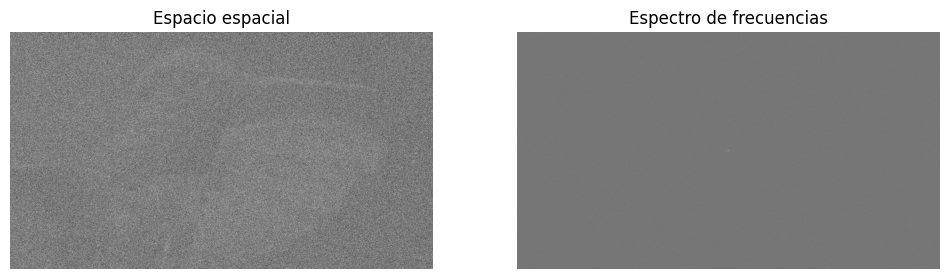

In [ ]:
# Añadir ruido gaussiano a la imagen original
def add_gaussian_noise(image, mean=-10, sigma=2100):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), noise)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Imagen con ruido
img_noisy = add_gaussian_noise(img)

# DFT
dft = cv2.dft(np.float32(img_noisy), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Magnitud
magnitude = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
spectrum = 20 * np.log(1 + magnitude)

# Mostrar espectros
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_noisy, cmap='gray')
plt.title('Espacio espacial')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spectrum, cmap='gray')
plt.title('Espectro de frecuencias')
plt.axis('off')
plt.show()


In [ ]:
# Crear máscara para conservar frecuencias bajas
mask = np.zeros((rows, cols, 2), np.uint8)
crow, ccol = rows // 2 , cols // 2
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Aplicar la máscara
fshift = dft_shifted * mask

# Transformar al dominio espacial
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


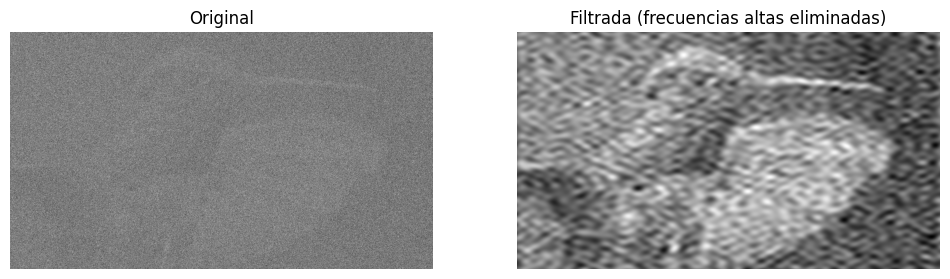

Resultado del enmascaramiento:
- Al eliminar frecuencias altas, se suaviza la imagen, reduciendo ruido.
- Se pierde nitidez, pero los contornos suaves se conservan.


In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_noisy, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Filtrada (frecuencias altas eliminadas)')
plt.axis('off')
plt.show()

print("Resultado del enmascaramiento:")
print("- Al eliminar frecuencias altas, se suaviza la imagen, reduciendo ruido.")
print("- Se pierde nitidez, pero los contornos suaves se conservan.")
